In [1]:
import tensorflow as tf    # importing tensorflow libraries

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [56]:
!pip install -U tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 49kB/s 
     |████████████████████████████████| 491kB 39.0MB/s 
     |████████████████████████████████| 3.2MB 32.4MB/s 
  Found existing installation: tensorflow-estimator 2.0.1
    Uninstalling tensorflow-estimator-2.0.1:
      Successfully uninstalled tensorflow-estimator-2.0.1
  Found existing installation: tensorboard 2.0.2
    Uninstalling tensorboard-2.0.2:
      Successfully uninstalled tensorboard-2.0.2
  Found existing installation: tensorflow 2.0.0
    Uninstalling tensorflow-2.0.0:
      Successfully uninstalled tensorflow-2.0.0


In [2]:
tf.__version__

'1.14.0'

In [0]:

import numpy as np
import pandas as pd

#Read Data
from google.colab import files

In [6]:
upload =files.upload ()

Saving bank.csv to bank (2).csv


In [7]:
for fn in upload.keys():
 print('User uploaded file "{name}" with length "{length}" bytes'.format(
     name=fn, length=len(upload[fn])))

User uploaded file "bank.csv" with length "684858" bytes


In [8]:
import io
bank=pd.read_csv(io.StringIO(upload['bank.csv'].decode('utf-8')))
print (bank.head())

   RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]


In [9]:
#Dropping the unique keys and attributes that are irrelevant to contriute towards defining the target
bank1=bank.drop(['RowNumber','CustomerId','Surname'],axis=1)
bank1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [10]:
print ('1. Shape of the data \n   ----------------')
print (bank1.shape, '\n')
print ('2. Data type of each attribute \n   --------------------------')
print (bank1.dtypes, '\n')
print ('3. Checking the presence of missing values  \n   -------------------------------------')
print (bank1.isnull().sum(), '\n')
print ('There are no missing values available in any of the column')

1. Shape of the data 
   ----------------
(10000, 11) 

2. Data type of each attribute 
   --------------------------
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object 

3. Checking the presence of missing values  
   -------------------------------------
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64 

There are no missing values available in any of the column


In [12]:
dict = {'France' : '1', 'Spain' : '2', 'Germany' : '3'} 
  
# Print the dictionary 
print(dict) 
  
# Remap the values of the dataframe 
bank1.replace({"Geography": dict},inplace=True)

{'France': '1', 'Spain': '2', 'Germany': '3'}


In [13]:
dict1 = {'Male' : '1', 'Female' : '2'} 
  
# Print the dictionary 
print(dict1) 
  
# Remap the values of the dataframe 
bank1.replace({"Gender": dict1},inplace=True)

{'Male': '1', 'Female': '2'}


In [17]:
bank1['Geography']=bank1['Geography'].astype(float)
bank1['Gender']=bank1['Gender'].astype(float)
print (bank1.head(2))
bank1.dtypes

   CreditScore  Geography  Gender  ...  IsActiveMember  EstimatedSalary  Exited
0          619        1.0     2.0  ...               1        101348.88       1
1          608        2.0     2.0  ...               1        112542.58       0

[2 rows x 11 columns]


CreditScore          int64
Geography          float64
Gender             float64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
bank1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Geography,10000.0,1.749500,0.830433,1.00,1.00,1.000,3.0000,3.00
Gender,10000.0,1.454300,0.497932,1.00,1.00,1.000,2.0000,2.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


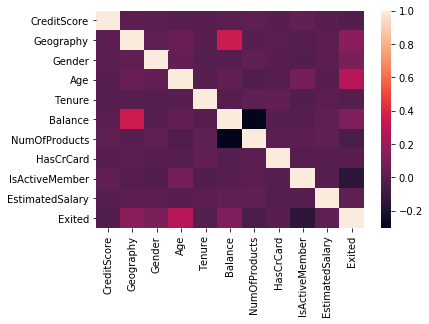

In [19]:
import seaborn as sns
sns.heatmap(bank1.corr())

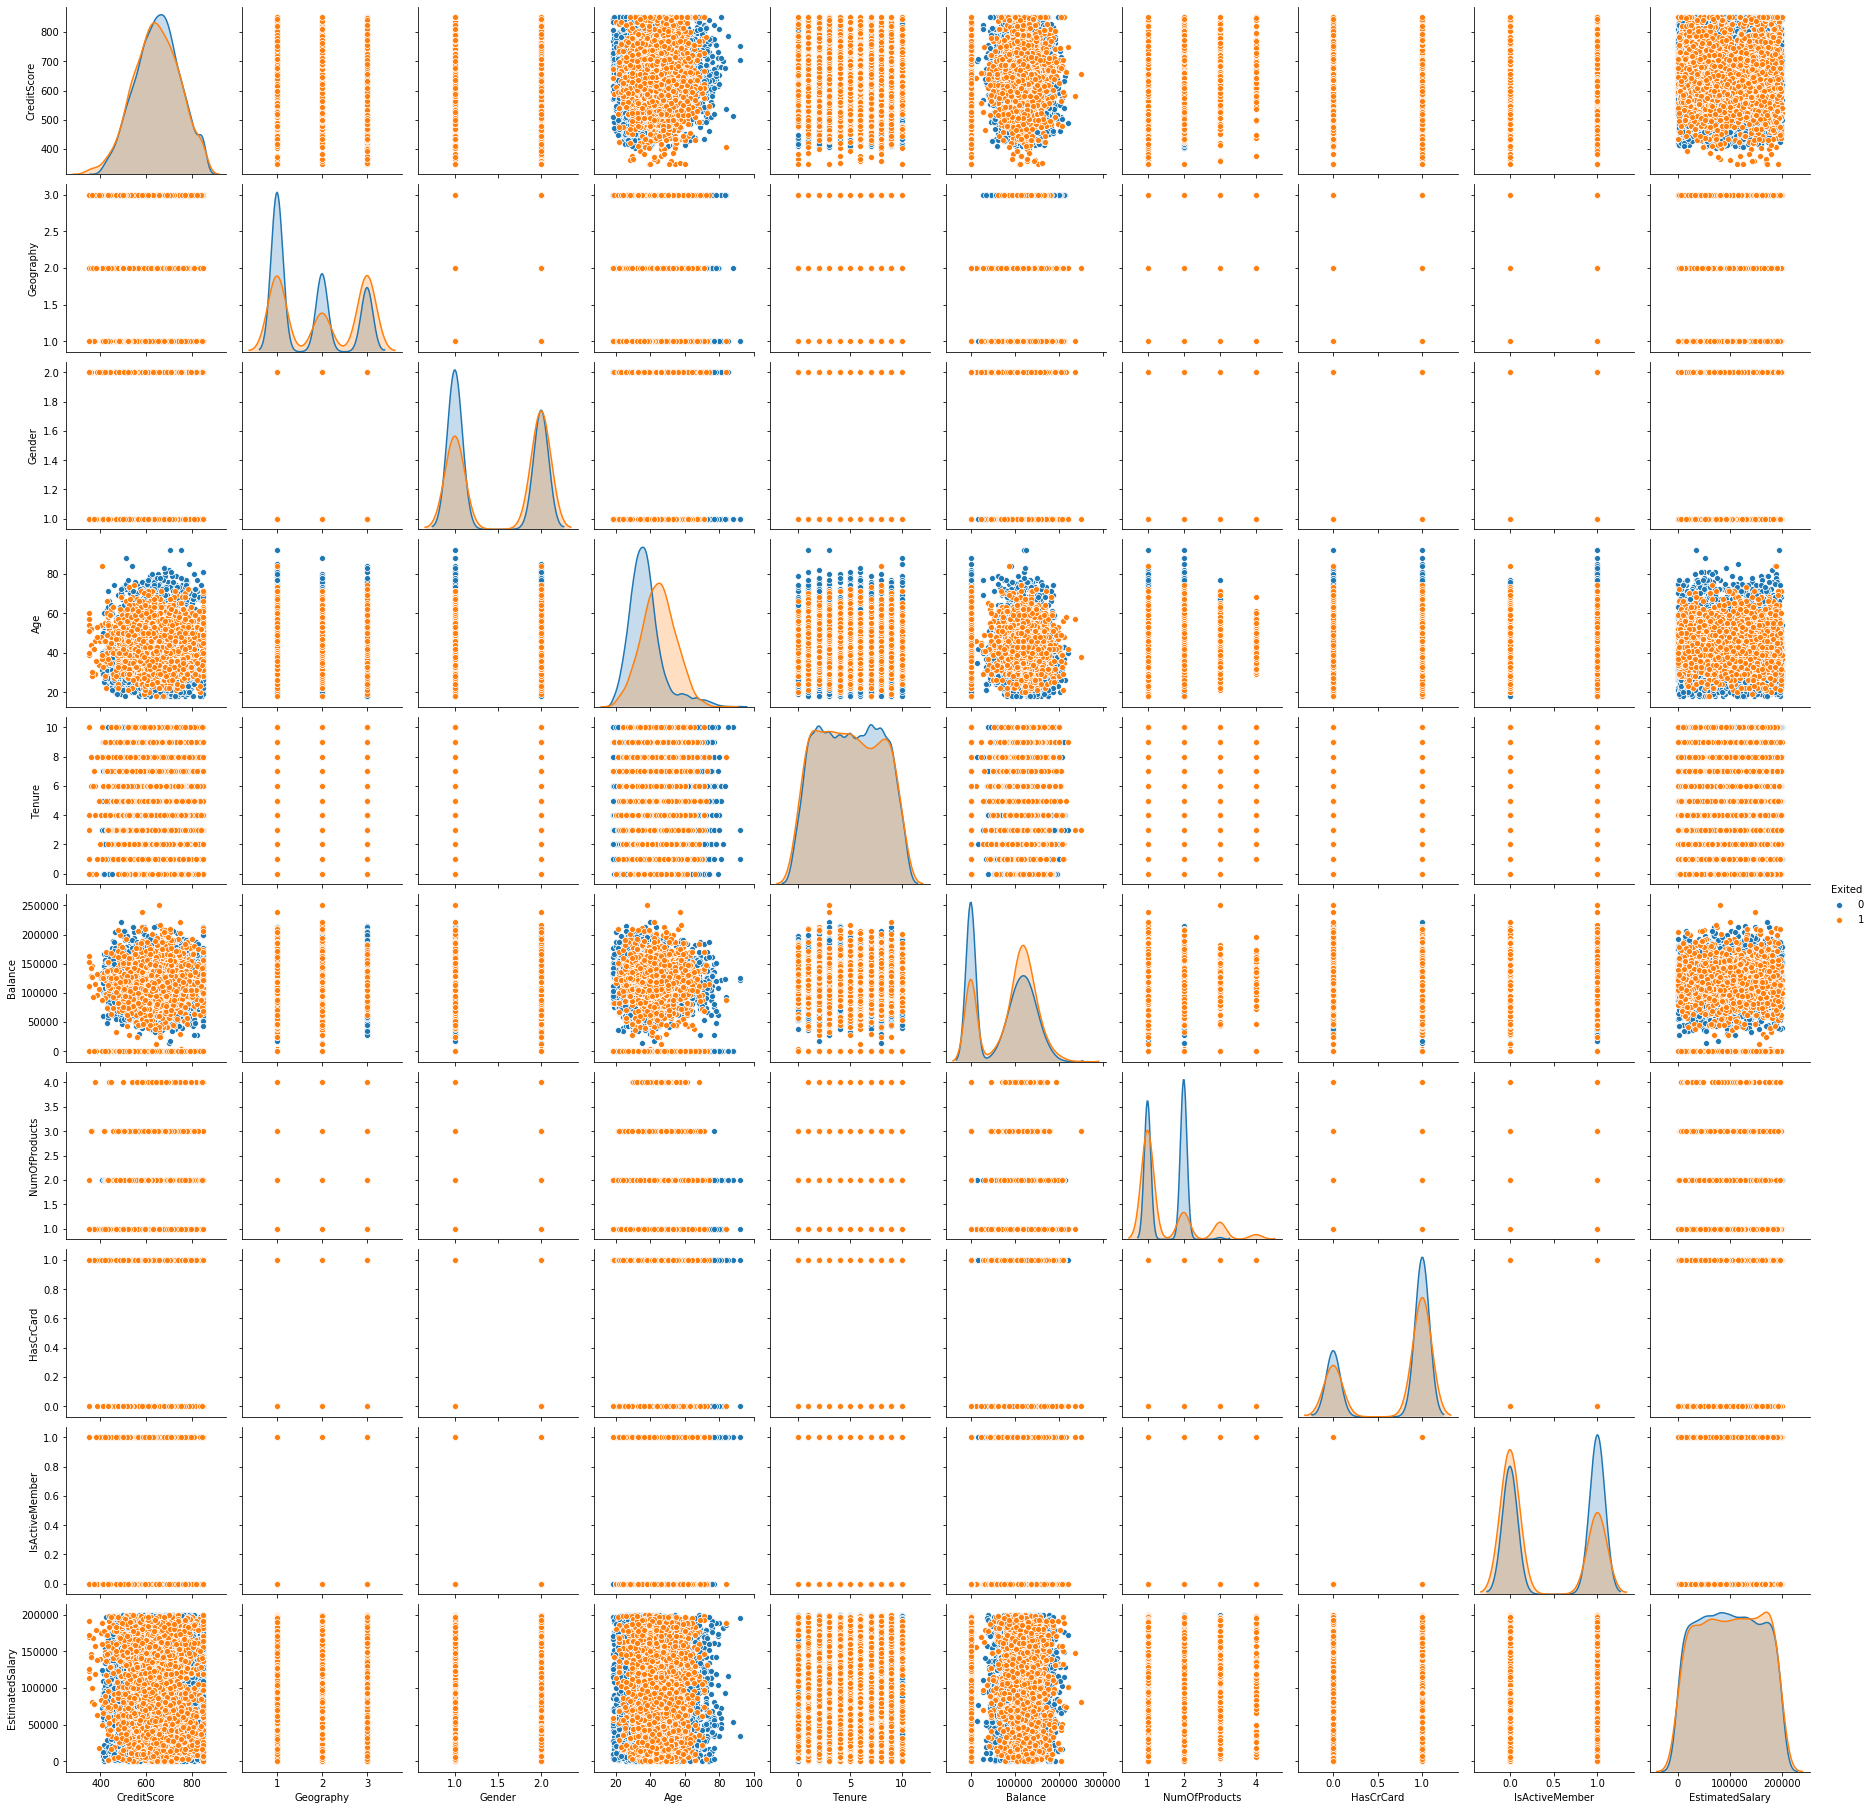

In [20]:
sns.pairplot(bank1,hue='Exited')

In [21]:
#Defining Target
y=bank1['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [23]:
#Defining feature and dropping target
x=bank1.drop('Exited',axis=1)
x.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1.0,2.0,42,2,0.00,1,1,1,101348.88
1,608,2.0,2.0,41,1,83807.86,1,0,1,112542.58


In [0]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=10)

In [23]:
print('x_train')
print(x_train.count())
print('x_test')
print(x_test.count())
print('y_Train')
print(y_train.count())
print('y_Test')
print(y_test.count())

x_train
CreditScore        7000
Geography          7000
Gender             7000
Age                7000
Tenure             7000
Balance            7000
NumOfProducts      7000
HasCrCard          7000
IsActiveMember     7000
EstimatedSalary    7000
dtype: int64
x_test
CreditScore        3000
Geography          3000
Gender             3000
Age                3000
Tenure             3000
Balance            3000
NumOfProducts      3000
HasCrCard          3000
IsActiveMember     3000
EstimatedSalary    3000
dtype: int64
y_Train
7000
y_Test
3000


In [0]:
# Import StandardScaler from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(x_train)

# Scale the train set
x_train_scaled = scaler.transform(x_train)

# Scale the test set
x_test_scaled = scaler.transform(x_test)

In [0]:
# Import `Sequential` from `keras.models`
from tensorflow import keras
from keras.models import Sequential

In [0]:
# Import `Dense` from `keras.layers`
from keras.layers import Dense,Dropout,Activation,Flatten

In [0]:
#from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from sklearn import metrics
import matplotlib.pyplot as plt

In [0]:
# Initialize the constructor
model = Sequential()

In [0]:
# Add an input layer 
model.add(Dense(6, activation='relu', input_shape=(10,)))

# Add an input layer 
#model.add(Dense(8, activation='relu', input_shape=(10,)))

# Add 1st hidden layer 
#model.add(Dense(6, activation='relu'))

# Add 2nd hidden layer 
model.add(Dense(4, activation='relu'))

# Add 3rd hidden layer 
model.add(Dense(2, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='relu'))

In [67]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_41 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 3         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________


In [68]:
#model.compile(loss='binary_crossentropy'

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(x_train_scaled, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
7000/7000 [==============================] - 12s 2ms/step - loss: 0.5962 - acc: 0.7976
Epoch 2/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.4732 - acc: 0.8069
Epoch 3/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.4365 - acc: 0.8173
Epoch 4/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.4277 - acc: 0.8319
Epoch 5/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.4601 - acc: 0.8336
Epoch 6/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.4403 - acc: 0.8361
Epoch 7/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.4525 - acc: 0.8373
Epoch 8/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.4733 - acc: 0.8380
Epoch 9/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.4238 - acc: 0.8430
Epoch 10/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.4088 - acc: 0.8419
Epoch 11/20
7000/70

In [0]:
y_pred = np.round(model.predict(x_test_scaled))

In [72]:
y_pred[0:10]

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [73]:
score = model.evaluate(x_test_scaled, y_test,verbose=1)

print(score)


3000/3000 [==============================] - 1s 175us/step
[0.43668867520491284, 0.8553333331743876]


In [74]:
from sklearn import metrics

print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))

      0    1
0  2325   55
1   379  241


In [75]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2380
           1       0.81      0.39      0.53       620

    accuracy                           0.86      3000
   macro avg       0.84      0.68      0.72      3000
weighted avg       0.85      0.86      0.83      3000

